# Data Exploration
## Basic Visualisation
## Calculate Correlation

In [1]:
import pandas as pd
from sklearn import neighbors, datasets

In [2]:
df = pd.read_csv('mm_master_demos.csv')
del df['Unnamed: 0']
del df['file']
del df['date']
del df['seconds']
del df['att_team']
del df['att_side']
del df['vic_team']
del df['vic_side']
del df['winner_team']
del df['winner_side']
del df['att_id']
del df['vic_id']
del df['award']
del df['is_bomb_planted']
del df['bomb_site']
df

,map,round,tick,hp_dmg,arm_dmg,hitbox,wp,wp_type,att_rank,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,de_dust2,1,8482,100,0,Head,USP,Pistol,17,17,1473.84700,1351.35800,662.17000,772.74800,PISTOL_ROUND,2950,3850,16.0
1,de_dust2,1,8600,25,0,RightLeg,USP,Pistol,16,17,-1211.72300,1060.81300,-1184.00600,1153.34300,PISTOL_ROUND,2950,3850,16.0
2,de_dust2,1,8610,20,0,LeftLeg,Glock,Pistol,17,16,-1153.58400,1163.13100,-1198.01500,1050.42300,PISTOL_ROUND,2950,3850,16.0
3,de_dust2,1,8624,17,8,Chest,USP,Pistol,16,17,-1173.05300,1044.36500,-1141.78500,1190.08900,PISTOL_ROUND,2950,3850,16.0
4,de_dust2,1,8632,12,7,Chest,Glock,Pistol,17,16,-1142.52200,1200.96700,-1157.69000,1050.70200,PISTOL_ROUND,2950,3850,16.0
5,de_dust2,1,8676,12,7,Chest,Glock,Pistol,17,16,-1186.30500,1211.95500,-1082.75600,1107.76900,PISTOL_ROUND,2950,3850,16.0
6,de_dust2,1,8686,12,7,Chest,Glock,Pistol,17,16,-1169.73600,1223.63900,-1071.76300,1121.34600,PISTOL_ROUND,2950,3850,16.0
7,de_dust2,1,8696,15,8,Stomach,Glock,Pistol,17,16,-1172.03300,1220.77900,-1062.39800,1135.77300,PISTOL_ROUND,2950,3850,16.0
8,de_dust2,1,8876,19,9,Stomach,USP,Pistol,16,17,-1970.94500,1303.59900,-1316.84800,1144.33000,PISTOL_ROUND,2950,3850,16.0
9,de_dust2,1,8886,15,7,Chest,USP,Pistol,16,17,-1952.19800,1271.12700,-1335.28600,1140.37100,PISTOL_ROUND,2950,3850,16.0


In [3]:
df.groupby('map')['att_rank'].mean().plot(kind='bar')

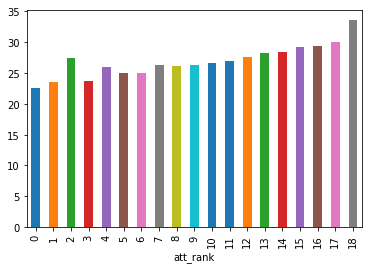

In [4]:
df.groupby('att_rank')['hp_dmg'].mean().plot(kind='bar')

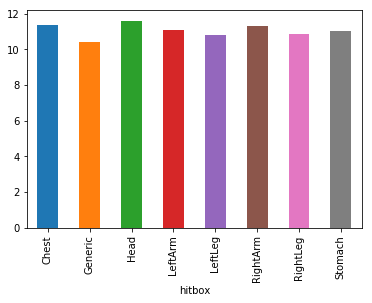

In [5]:
df.groupby('hitbox')['att_rank'].mean().plot(kind='bar')

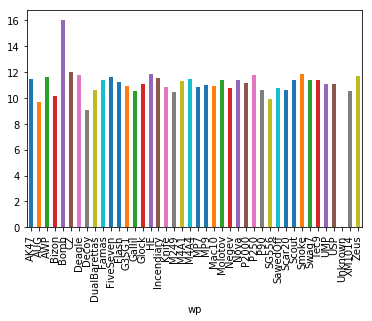

In [6]:
df.groupby('wp')['att_rank'].mean().plot(kind='bar')

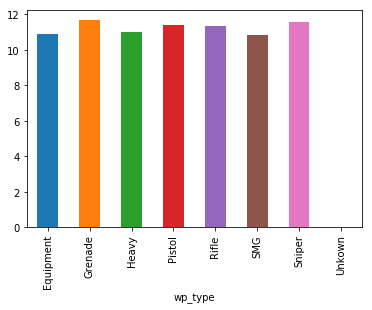

In [7]:
df.groupby('wp_type')['att_rank'].mean().plot(kind='bar')

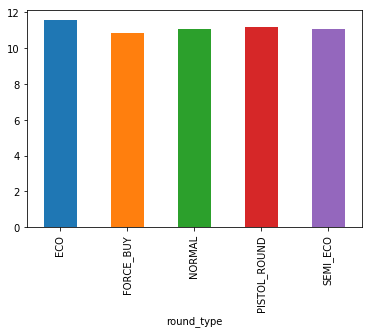

In [8]:
df.groupby('round_type')['att_rank'].mean().plot(kind='bar')

In [9]:
df.round_type.value_counts()

NORMAL          425090
ECO             244599
FORCE_BUY       143944
PISTOL_ROUND     75133
SEMI_ECO         66700
Name: round_type, dtype: int64

In [10]:
df.dtypes

map                object
round               int64
tick                int64
hp_dmg              int64
arm_dmg             int64
hitbox             object
wp                 object
wp_type            object
att_rank            int64
vic_rank            int64
att_pos_x         float64
att_pos_y         float64
vic_pos_x         float64
vic_pos_y         float64
round_type         object
ct_eq_val           int64
t_eq_val            int64
avg_match_rank    float64
dtype: object

# Data Preparation
## Filer
- Missing Values
- Convert Text values to numbers

## Convert Categories
### Hitbox
Head and Chest --> UpperBody --> 0
Stomach and Arms --> CenterBody --> 1
Legs and Generic --> LowerBody --> 2

### Map
low skill high skill?

### Weapons
one hot encode has_bomb --> can KNN handle 0 values?
what todo with rest??

### Round Type
ECO --> 0
NORMAL, PISTOL, SEMI_ECO --> 1
FORCE_BUY --> 2

In [11]:
clean_df = df.copy()

numeric_cats = {
    "hitbox": {"Head": 0, "Chest": 0, "Stomach": 1, "RightArm": 1, "LeftArm": 1, "Generic": 2, "RightLeg": 2, "LeftLeg": 2},
    "round_type": {"ECO": 0, "NORMAL": 1, "PISTOL_ROUND": 1, "SEMI_ECO": 1, "FORCE_BUY": 2}
}
clean_df.replace(numeric_cats, inplace=True)
clean_df.head()
clean_df.hitbox.value_counts()
clean_df.dtypes

map                object
round               int64
tick                int64
hp_dmg              int64
arm_dmg             int64
hitbox              int64
wp                 object
wp_type            object
att_rank            int64
vic_rank            int64
att_pos_x         float64
att_pos_y         float64
vic_pos_x         float64
vic_pos_y         float64
round_type          int64
ct_eq_val           int64
t_eq_val            int64
avg_match_rank    float64
dtype: object

In [12]:
one_hot_df = pd.get_dummies(clean_df, columns=['map', 'wp_type', 'wp'])
one_hot_df.head()
one_hot_df.dtypes

round                 int64
tick                  int64
hp_dmg                int64
arm_dmg               int64
hitbox                int64
att_rank              int64
vic_rank              int64
att_pos_x           float64
att_pos_y           float64
vic_pos_x           float64
vic_pos_y           float64
round_type            int64
ct_eq_val             int64
t_eq_val              int64
avg_match_rank      float64
map_cs_agency         uint8
map_cs_assault        uint8
map_cs_insertion      uint8
map_cs_italy          uint8
map_cs_office         uint8
map_de_austria        uint8
map_de_aztec          uint8
map_de_blackgold      uint8
map_de_cache          uint8
map_de_canals         uint8
map_de_cbble          uint8
map_de_dust           uint8
map_de_dust2          uint8
map_de_inferno        uint8
map_de_mirage         uint8
                     ...   
wp_G3SG1              uint8
wp_Gallil             uint8
wp_Glock              uint8
wp_HE                 uint8
wp_Incendiary       

In [13]:
rankDF = one_hot_df['att_rank']
#del one_hot_df['att_rank']
normalizedDF = (one_hot_df-one_hot_df.min())/(one_hot_df.max()-one_hot_df.min())
normalizedDF['att_rank']=rankDF.values
normalizedDF

,round,tick,hp_dmg,arm_dmg,hitbox,att_rank,vic_rank,att_pos_x,att_pos_y,vic_pos_x,...,wp_Scar20,wp_Scout,wp_Smoke,wp_Swag7,wp_Tec9,wp_UMP,wp_USP,wp_Unknown,wp_XM1014,wp_Zeus
0,0.000000,0.010683,1.00,0.00,0.0,17,0.944444,0.657655,0.310926,0.611965,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.011218,0.25,0.00,1.0,16,0.944444,0.503554,0.295098,0.506270,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000000,0.011263,0.20,0.00,1.0,17,0.888889,0.506890,0.300672,0.505467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.011327,0.17,0.08,0.0,16,0.944444,0.505773,0.294202,0.508687,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.011363,0.12,0.07,0.0,17,0.888889,0.507525,0.302733,0.507776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.011562,0.12,0.07,0.0,17,0.888889,0.505012,0.303332,0.512066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.011608,0.12,0.07,0.0,17,0.888889,0.505963,0.303968,0.512696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.011653,0.15,0.08,0.5,17,0.888889,0.505831,0.303812,0.513232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.012468,0.19,0.09,0.5,16,0.944444,0.459989,0.308324,0.498664,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.000000,0.012514,0.15,0.07,0.0,16,0.944444,0.461064,0.306555,0.497609,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
normalizedDF['att_rank'].corr(df['vic_rank'])

0.6450046205371979

In [15]:
normalizedDF.corr()['att_rank']
normalizedDF.dtypes

round               float64
tick                float64
hp_dmg              float64
arm_dmg             float64
hitbox              float64
att_rank              int64
vic_rank            float64
att_pos_x           float64
att_pos_y           float64
vic_pos_x           float64
vic_pos_y           float64
round_type          float64
ct_eq_val           float64
t_eq_val            float64
avg_match_rank      float64
map_cs_agency       float64
map_cs_assault      float64
map_cs_insertion    float64
map_cs_italy        float64
map_cs_office       float64
map_de_austria      float64
map_de_aztec        float64
map_de_blackgold    float64
map_de_cache        float64
map_de_canals       float64
map_de_cbble        float64
map_de_dust         float64
map_de_dust2        float64
map_de_inferno      float64
map_de_mirage       float64
                     ...   
wp_G3SG1            float64
wp_Gallil           float64
wp_Glock            float64
wp_HE               float64
wp_Incendiary       

In [16]:
Y = one_hot_df['att_rank']
X = one_hot_df.copy()
del X['att_rank']

knn=neighbors.KNeighborsClassifier()
knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:

knn.predict(X.iloc[0])

ValueError: Expected 2D array, got 1D array instead:
array=[1.000000e+00 8.482000e+03 1.000000e+02 0.000000e+00 0.000000e+00
 1.700000e+01 1.473847e+03 1.351358e+03 6.621700e+02 7.727480e+02
 1.000000e+00 2.950000e+03 3.850000e+03 1.600000e+01 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.